In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install wordcloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import re
from collections import Counter
import warnings
import emoji
import re
warnings.filterwarnings('ignore')   

In [ ]:
# Read CSV file and print the contents

df = pd.read_csv('test_ai_posts_historical.csv')
print(df.head()) # Read CSV file and print the contents

# Make into dataframe
df = pd.DataFrame(df)
print(df.head())

In [6]:
def clean_text(text):
    if not isinstance(text, str): 
        return ""
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = emoji.demojize(text)
    text = re.sub(r"@", "", text)
    return text

df['cleaned_text'] = df['text'].apply(clean_text)

In [8]:
df.to_csv('cleaned_ai_posts_historical.csv', index=False)

In [7]:
# Check for missing values
print(df.isnull().sum())

keyword                    0
author                     0
text                    1803
created_at                 0
uri                        0
like_count                 0
repost_count               0
reply_count                0
author_display_name    38831
has_embedded_media         0
cleaned_text               0
dtype: int64


In [13]:
CEO_filtered_df = df[df['cleaned_text'].str.contains('Sam Altman|Elon Musk', case=False, na=False)]

In [14]:
CEO_filtered_df.to_csv('CEO_filtered_ai_posts_historical.csv', index=False)

In [ ]:
job_filtered_df = df[df['cleaned_text'].str.contains('job|employment|hiring|layoff|unemployment', case=False, na=False)]
job_filtered_df.to_csv('job_filtered_ai_posts_historical.csv', index=False)

In [2]:
job_filtered_df=pd.read_csv('job_filtered_ai_posts_historical.csv')

In [3]:
# Run bertopic on filtered dataframe
from bertopic import BERTopic
from sklearn.feature_extraction.text import CountVectorizer
vectorizer_model = CountVectorizer(ngram_range=(1, 2), stop_words="english")
topic_model = BERTopic(vectorizer_model=vectorizer_model, language="english", calculate_probabilities=True, verbose=True)
texts = job_filtered_df['cleaned_text'].tolist()
topics, probabilities = topic_model.fit_transform(texts)

2025-11-21 17:59:05,331 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 387/387 [1:15:00<00:00, 11.63s/it]     
2025-11-21 19:14:08,766 - BERTopic - Embedding - Completed ✓
2025-11-21 19:14:08,769 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-11-21 19:15:21,195 - BERTopic - Dimensionality - Completed ✓
2025-11-21 19:15:21,202 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-11-21 19:15:50,222 - BERTopic - Cluster - Completed ✓
2025-11-21 19:15:50,242 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-11-21 19:15:54,880 - BERTopic - Representation - Completed ✓


In [1]:
from bertopic import BERTopic

c:\Users\Huawei\anaconda3\envs\bertopic_env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [16]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,3678,-1_ai_jobs_job_just,"[ai, jobs, job, just, people, llm, like, new, ...","[:loudspeaker: OpenAI is #hiring a Data Lead, ..."
1,0,1545,0_chatgpt_job_write_use chatgpt,"[chatgpt, job, write, use chatgpt, use, using ...","[Even ChatGPT does a better job., ChatGPT does..."
2,1,820,1_llm_job_llms_code,"[llm, job, llms, code, using llm, good, like, ...","[If you apply for a job, and all you can do is..."
3,2,541,2_chatgpt_ai_use_using,"[chatgpt, ai, use, using, job, like chatgpt, l...",[ The Job Market Is Hell Young people are usin...
4,3,540,3_openai_platform_jobs platform_jobs,"[openai, platform, jobs platform, jobs, certif...","[OpenAI Plans Jobs Platform, Certification Pro..."
...,...,...,...,...,...
122,121,11,121_engineer robotics_robotics openai_robotics...,"[engineer robotics, robotics openai, robotics,...",[:loudspeaker: OpenAI is #hiring a DAQ Softwar...
123,122,11,122_app_deepseek app_team embrace_someday ive,"[app, deepseek app, team embrace, someday ive,...","[rocksolver.rocks I despise AI, but I’m forced..."
124,123,11,123_model policy_dublin_manager globeshowingam...,"[model policy, dublin, manager globeshowingame...",[:loudspeaker: Openai is #hiring a Support Par...
125,124,10,124_trends watch_industries perspective_study ...,"[trends watch, industries perspective, study s...","[Quite simple really. Whether it’s tulips, rob..."


In [17]:
topic_model.get_topic(0)

[('chatgpt', np.float64(0.023293774632921285)),
 ('job', np.float64(0.010480266881520057)),
 ('write', np.float64(0.008081882965689135)),
 ('use chatgpt', np.float64(0.0076286990620444625)),
 ('use', np.float64(0.007012338400345468)),
 ('using chatgpt', np.float64(0.006786260940392243)),
 ('just', np.float64(0.006225280576526357)),
 ('chatgpt write', np.float64(0.005869702262660165)),
 ('using', np.float64(0.0058417269465063405)),
 ('good', np.float64(0.00575390683504996))]

In [6]:
import pandas as pd
import os

# Define the output directory
output_dir = "bertopic_visualizations"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)
    print(f"Created output directory: {output_dir}")

# --- 1. Probability Reset and Topic Reduction (FIXED CODE) ---
nr_topics = 40

# --- FIX: Set probabilities_ to None to avoid mapping errors during reduction ---
# This forces the model to ignore the complex, large original probabilities matrix.
topic_model.probabilities_ = None
print("Probabilities matrix reset to avoid Index Error.")

# Reduce topics - using docs=texts and nr_topics
print(f"Original number of topics (including outliers): {len(topic_model.get_topic_info())}")
topic_model.reduce_topics(docs=texts, nr_topics=nr_topics) 

# --- RECALCULATE TOPIC ASSIGNMENTS and PROBABILITIES ---
# Rerun transform on the aligned texts to get new assignments based on the reduced topics
new_topics, new_probabilities = topic_model.transform(texts)
topic_model.probabilities_ = new_probabilities
topic_model.topics_ = new_topics

# Get the updated topic information
topic_info = topic_model.get_topic_info()
print(f"Reduced number of topics (including outliers): {len(topic_info)}")

# Save the updated info
topic_info.to_csv(os.path.join(output_dir, "reduced_topic_info.csv"), index=False)
print("\nSaved reduced topic information.")

# --- 2. Visualization Generation and Saving ---

## 2.1 Intertopic Distance Map (UMAP/t-SNE)
fig_distance = topic_model.visualize_topics()
fig_distance.write_html(os.path.join(output_dir, "01_intertopic_distance_map.html"))
print("Saved 01_intertopic_distance_map.html")

## 2.2 Topic Similarity Heatmap
fig_heatmap = topic_model.visualize_heatmap()
fig_heatmap.write_html(os.path.join(output_dir, "02_topic_similarity_heatmap.html"))
print("Saved 02_topic_similarity_heatmap.html")

## 2.3 Topic Word Scores (Bar Chart for Top 10 Topics)
fig_barchart = topic_model.visualize_barchart(top_n_topics=10)
fig_barchart.write_html(os.path.join(output_dir, "03_top_10_topic_barchart.html"))
print("Saved 03_top_10_topic_barchart.html")

2025-11-21 19:17:52,589 - BERTopic - Topic reduction - Reducing number of topics
2025-11-21 19:17:52,591 - BERTopic - Topic reduction - Number of topics (40) is equal or higher than the clustered topics(40).
2025-11-21 19:17:52,591 - BERTopic - Representation - Fine-tuning topics using representation models.


Probabilities matrix reset to avoid Index Error.
Original number of topics (including outliers): 40


2025-11-21 19:17:56,281 - BERTopic - Representation - Completed ✓
Batches: 100%|██████████| 387/387 [06:38<00:00,  1.03s/it]
2025-11-21 19:24:37,233 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2025-11-21 19:24:37,301 - BERTopic - Dimensionality - Completed ✓
2025-11-21 19:24:37,303 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2025-11-21 19:24:38,449 - BERTopic - Probabilities - Start calculation of probabilities with HDBSCAN
2025-11-21 19:24:55,802 - BERTopic - Probabilities - Completed ✓
2025-11-21 19:24:55,803 - BERTopic - Cluster - Completed ✓


Reduced number of topics (including outliers): 40

Saved reduced topic information.
Saved 01_intertopic_distance_map.html
Saved 02_topic_similarity_heatmap.html
Saved 03_top_10_topic_barchart.html


In [8]:
from transformers import pipeline

emotion_classifier = pipeline(
    task="text-classification", 
    model="SamLowe/roberta-base-go_emotions", 
    top_k=None  
)

Device set to use cpu


In [14]:
# senity check with 5 rows
test_subset = job_filtered_df['cleaned_text'].head(5).tolist()
test_results = emotion_classifier(test_subset)
print(test_results[0])

[{'label': 'admiration', 'score': 0.5000461935997009}, {'label': 'neutral', 'score': 0.41787123680114746}, {'label': 'approval', 'score': 0.13759225606918335}, {'label': 'realization', 'score': 0.013795332051813602}, {'label': 'gratitude', 'score': 0.011066115461289883}, {'label': 'optimism', 'score': 0.006674056872725487}, {'label': 'disapproval', 'score': 0.005417046137154102}, {'label': 'annoyance', 'score': 0.00437315646559}, {'label': 'disappointment', 'score': 0.003604173194617033}, {'label': 'pride', 'score': 0.002216801978647709}, {'label': 'excitement', 'score': 0.0018214614829048514}, {'label': 'joy', 'score': 0.0013291846262291074}, {'label': 'confusion', 'score': 0.0012959284940734506}, {'label': 'caring', 'score': 0.001080058515071869}, {'label': 'surprise', 'score': 0.000973330345004797}, {'label': 'curiosity', 'score': 0.0009501974564045668}, {'label': 'desire', 'score': 0.0008616532431915402}, {'label': 'relief', 'score': 0.0008124181185849011}, {'label': 'disgust', 'sc

In [51]:
job_filtered_df.shape

(12376, 12)

In [19]:
import pandas as pd
from tqdm import tqdm

# ==========================================
# Step 1: Attach Topic IDs to Original Data
# ==========================================
# We must do this BEFORE sampling so we don't lose the topic labels
if len(topic_model.topics_) == len(job_filtered_df):
    job_filtered_df['topic'] = topic_model.topics_
    print("Success: 'topic' column added to dataframe.")
else:
    print(f"Warning: Length mismatch. Topics: {len(topic_model.topics_)}, DF: {len(job_filtered_df)}")

# ==========================================
# Step 2: Sampling (Smart Sampling)
# ==========================================
TARGET_N = 2000  # Adjust this number if you want more data

if len(job_filtered_df) > TARGET_N:
    print(f"Data is sufficient. Sampling {TARGET_N} rows...")
    # Because we added 'topic' in Step 1, this sample now includes the topic column
    sample_df = job_filtered_df.sample(n=TARGET_N, random_state=42).reset_index(drop=True)
else:
    print(f"Data is smaller than {TARGET_N}. Using all available data...")
    sample_df = job_filtered_df.copy().reset_index(drop=True)

# ==========================================
# Step 3: Run Sentiment Analysis
# ==========================================
target_emotions = ['fear', 'nervousness', 'confusion', 'sadness', 'disappointment', 'optimism']
texts = sample_df['cleaned_text'].tolist()
results = []
BATCH_SIZE = 32

print("Starting sentiment analysis...")

for i in tqdm(range(0, len(texts), BATCH_SIZE), desc="Processing Batches"):
    batch_texts = texts[i : i + BATCH_SIZE]
    # truncation=True fixes the "expanded size" error
    batch_results = emotion_classifier(batch_texts, truncation=True, max_length=512)
    results.extend(batch_results)

# ==========================================
# Step 4: Extract Scores & Calculate Net Risk
# ==========================================
print("Extracting scores...")
emotion_data = []

for result in results:
    scores = {emotion: 0.0 for emotion in target_emotions}
    for item in result:
        if item['label'] in target_emotions:
            scores[item['label']] = item['score']
    emotion_data.append(scores)

# Create emotion dataframe
emotion_df = pd.DataFrame(emotion_data)

# Concatenate with the sample dataframe
final_df = pd.concat([sample_df, emotion_df], axis=1)

# Formula: Net Risk = (Fear + Nervousness) - Optimism
final_df['net_risk_score'] = (final_df['fear'] + final_df['nervousness']) - final_df['optimism']

print("\nProcessing Complete!")
print("Preview of final data:")
print(final_df[['topic', 'net_risk_score']].head())

Success: 'topic' column added to dataframe.
Data is sufficient. Sampling 2000 rows...
Starting sentiment analysis...


Processing Batches: 100%|██████████| 63/63 [05:25<00:00,  5.16s/it]

Extracting scores...

Processing Complete!
Preview of final data:
   topic  net_risk_score
0     -1       -0.000686
1     -1       -0.014215
2      0        0.000254
3      7       -0.001817
4      2       -0.001312


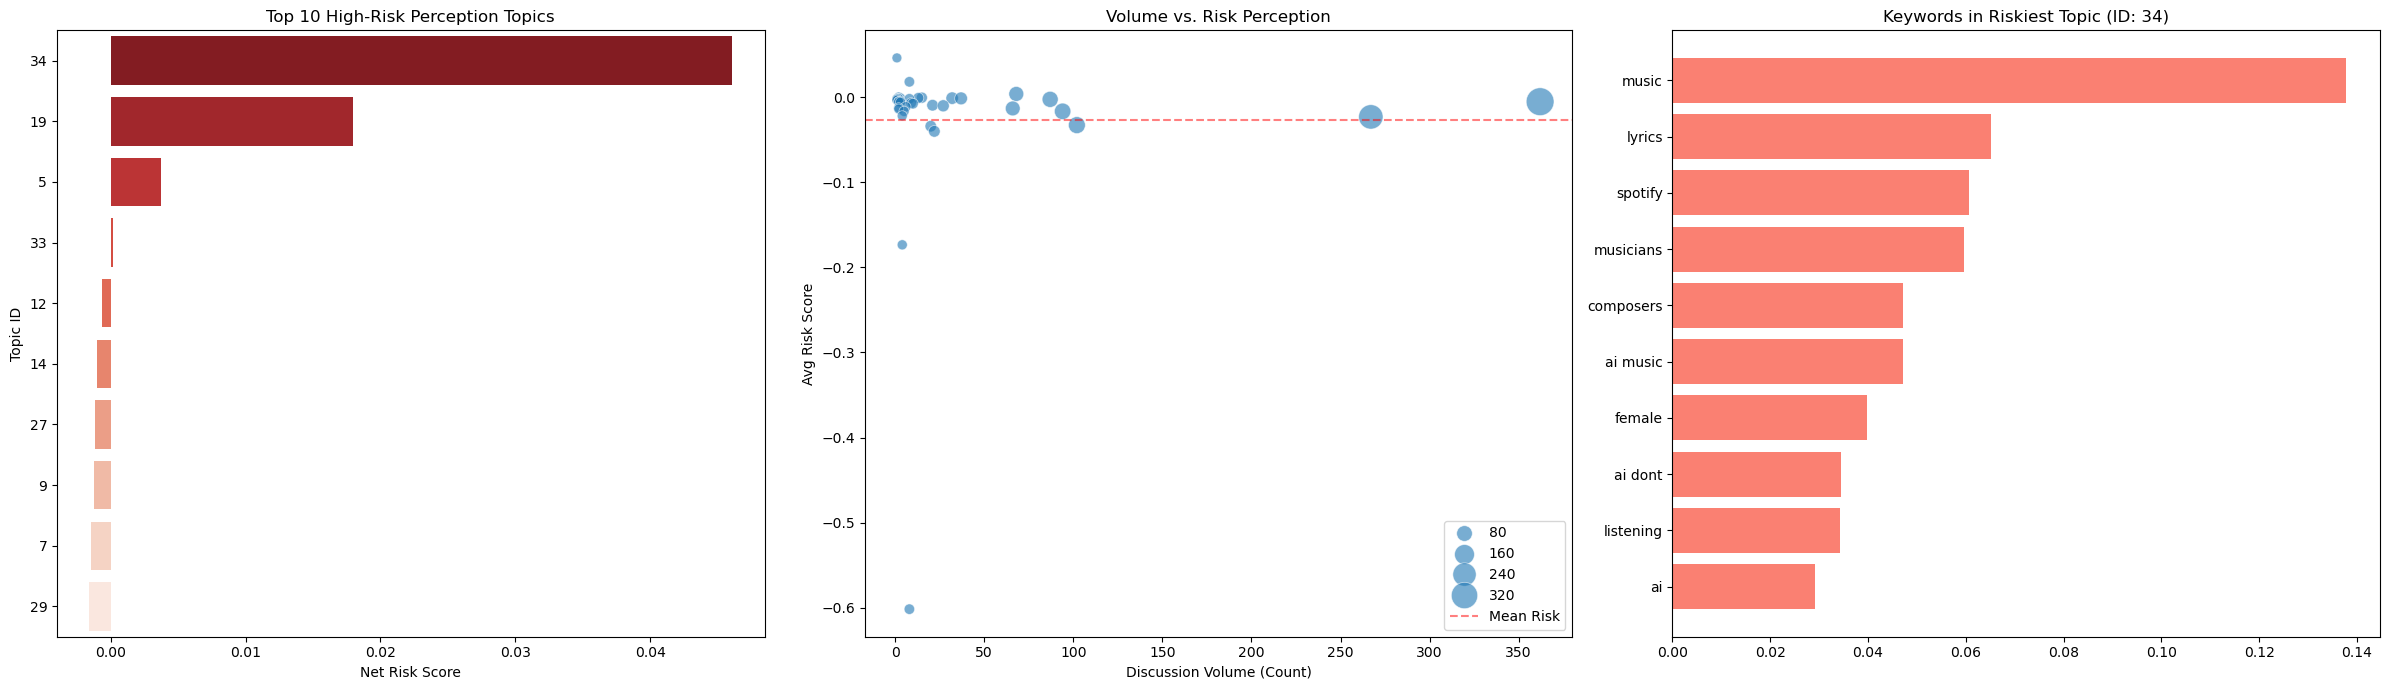


Saved final dataframe to job_filtered_graphs


In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ==========================================
# Step 1: Prepare Statistics
# ==========================================
# Group by 'topic' and calculate mean risk score and volume (count)
topic_stats = final_df.groupby('topic')['net_risk_score'].agg(['mean', 'count'])
topic_stats.columns = ['Avg_Risk_Score', 'Volume']

# Sort by risk score descending
topic_stats = topic_stats.sort_values('Avg_Risk_Score', ascending=False)

# Remove outlier topic -1 (noise) if it exists
if -1 in topic_stats.index:
    topic_stats_clean = topic_stats.drop(-1)
else:
    topic_stats_clean = topic_stats

# ==========================================
# Step 2: Plotting (3 Charts)
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(24, 7))

# --- Chart 1: The Risk Leaderboard ---
# Show top 10 topics with highest risk perception
top_10_risky = topic_stats_clean.head(10)
sns.barplot(
    x=top_10_risky['Avg_Risk_Score'], 
    y=top_10_risky.index.astype(str), 
    ax=axes[0], 
    palette='Reds_r'
)
axes[0].set_title('Top 10 High-Risk Perception Topics')
axes[0].set_xlabel('Net Risk Score')
axes[0].set_ylabel('Topic ID')

# --- Chart 2: Volume vs. Fear ---
# Scatter plot to see if high volume means high fear
sns.scatterplot(
    data=topic_stats_clean, 
    x='Volume', 
    y='Avg_Risk_Score', 
    size='Volume', 
    sizes=(50, 400), 
    alpha=0.6, 
    ax=axes[1]
)
axes[1].set_title('Volume vs. Risk Perception')
axes[1].set_xlabel('Discussion Volume (Count)')
axes[1].set_ylabel('Avg Risk Score')
# Add a horizontal line for the average risk
avg_risk_line = topic_stats_clean['Avg_Risk_Score'].mean()
axes[1].axhline(y=avg_risk_line, color='red', linestyle='--', alpha=0.5, label='Mean Risk')
axes[1].legend()

# --- Chart 3: Keywords in the Riskiest Topic ---
# Visualize keywords for the #1 riskiest topic
if not topic_stats_clean.empty:
    riskiest_topic_id = topic_stats_clean.index[0]
    
    # Get keywords from BERTopic model
    keywords = topic_model.get_topic(riskiest_topic_id) 

    if keywords:
        words = [k[0] for k in keywords[:10]] # Top 10 words
        scores = [k[1] for k in keywords[:10]]
        
        axes[2].barh(words, scores, color='salmon')
        axes[2].set_title(f'Keywords in Riskiest Topic (ID: {riskiest_topic_id})')
        axes[2].invert_yaxis() # Highest score at top
    else:
        axes[2].text(0.5, 0.5, 'No keywords found', ha='center')
else:
    axes[2].text(0.5, 0.5, 'No data available', ha='center')

plt.tight_layout()
output_dir = "job_filtered_graphs"
plt.savefig(os.path.join(output_dir, 'topic_risk_analysis.png'))
plt.show()

# Save the final dataframe with topic and emotion scores
final_df.to_csv(os.path.join(output_dir, 'final_df_with_emotions_and_topics.csv'), index=False)
print(f"\nSaved final dataframe to {output_dir}")

In [24]:
avg_risk_per_topic = final_df.groupby('topic')['net_risk_score'].mean()
avg_risk_per_topic = avg_risk_per_topic.sort_values(ascending=False)
print(avg_risk_per_topic.head(5))


topic
34    0.046077
19    0.017983
5     0.003739
33    0.000144
12   -0.000661
Name: net_risk_score, dtype: float64


In [31]:
import pandas as pd

# ==========================================
# Step 1: Generate Readable Topic Labels
# ==========================================
print("Generating readable labels for topics...")

# Create a dictionary to map Topic ID -> Topic Label
topic_id_to_label = {}

# Iterate through all topic IDs in your stats dataframe
for topic_id in topic_stats_clean.index:
    # Get the list of keywords for this topic
    keywords_list = topic_model.get_topic(topic_id)
    
    if keywords_list:
        # Extract the top 3 words (k[0] is the word)
        top_3_words = [k[0] for k in keywords_list[:3]]
        # Join them with a separator
        label = " | ".join(top_3_words)
    else:
        # Fallback if no keywords found
        label = f"Topic {topic_id}"
        
    # Store in dictionary
    topic_id_to_label[topic_id] = label

# Map the new labels to a new column 'Topic_Label'
topic_stats_clean['Topic_Label'] = topic_stats_clean.index.map(topic_id_to_label)

print("Labels generated! Preview of the first 5 rows:")
# Check what the new column looks like
print(topic_stats_clean[['Topic_Label', 'Avg_Risk_Score']].head())

Generating readable labels for topics...
Labels generated! Preview of the first 5 rows:
                                  Topic_Label  Avg_Risk_Score
topic                                                        
34                   music | lyrics | spotify        0.046077
19                  apple | steve jobs | musk        0.017983
5                         layoffs | ai | jobs        0.003739
33       airport | airport managers | air gop        0.000144
12     aiart fantasy | fantasy jobs | fantasy       -0.000661


Plot saved as: job_filtered_graphs\risk_perception_analysis_labeled.png


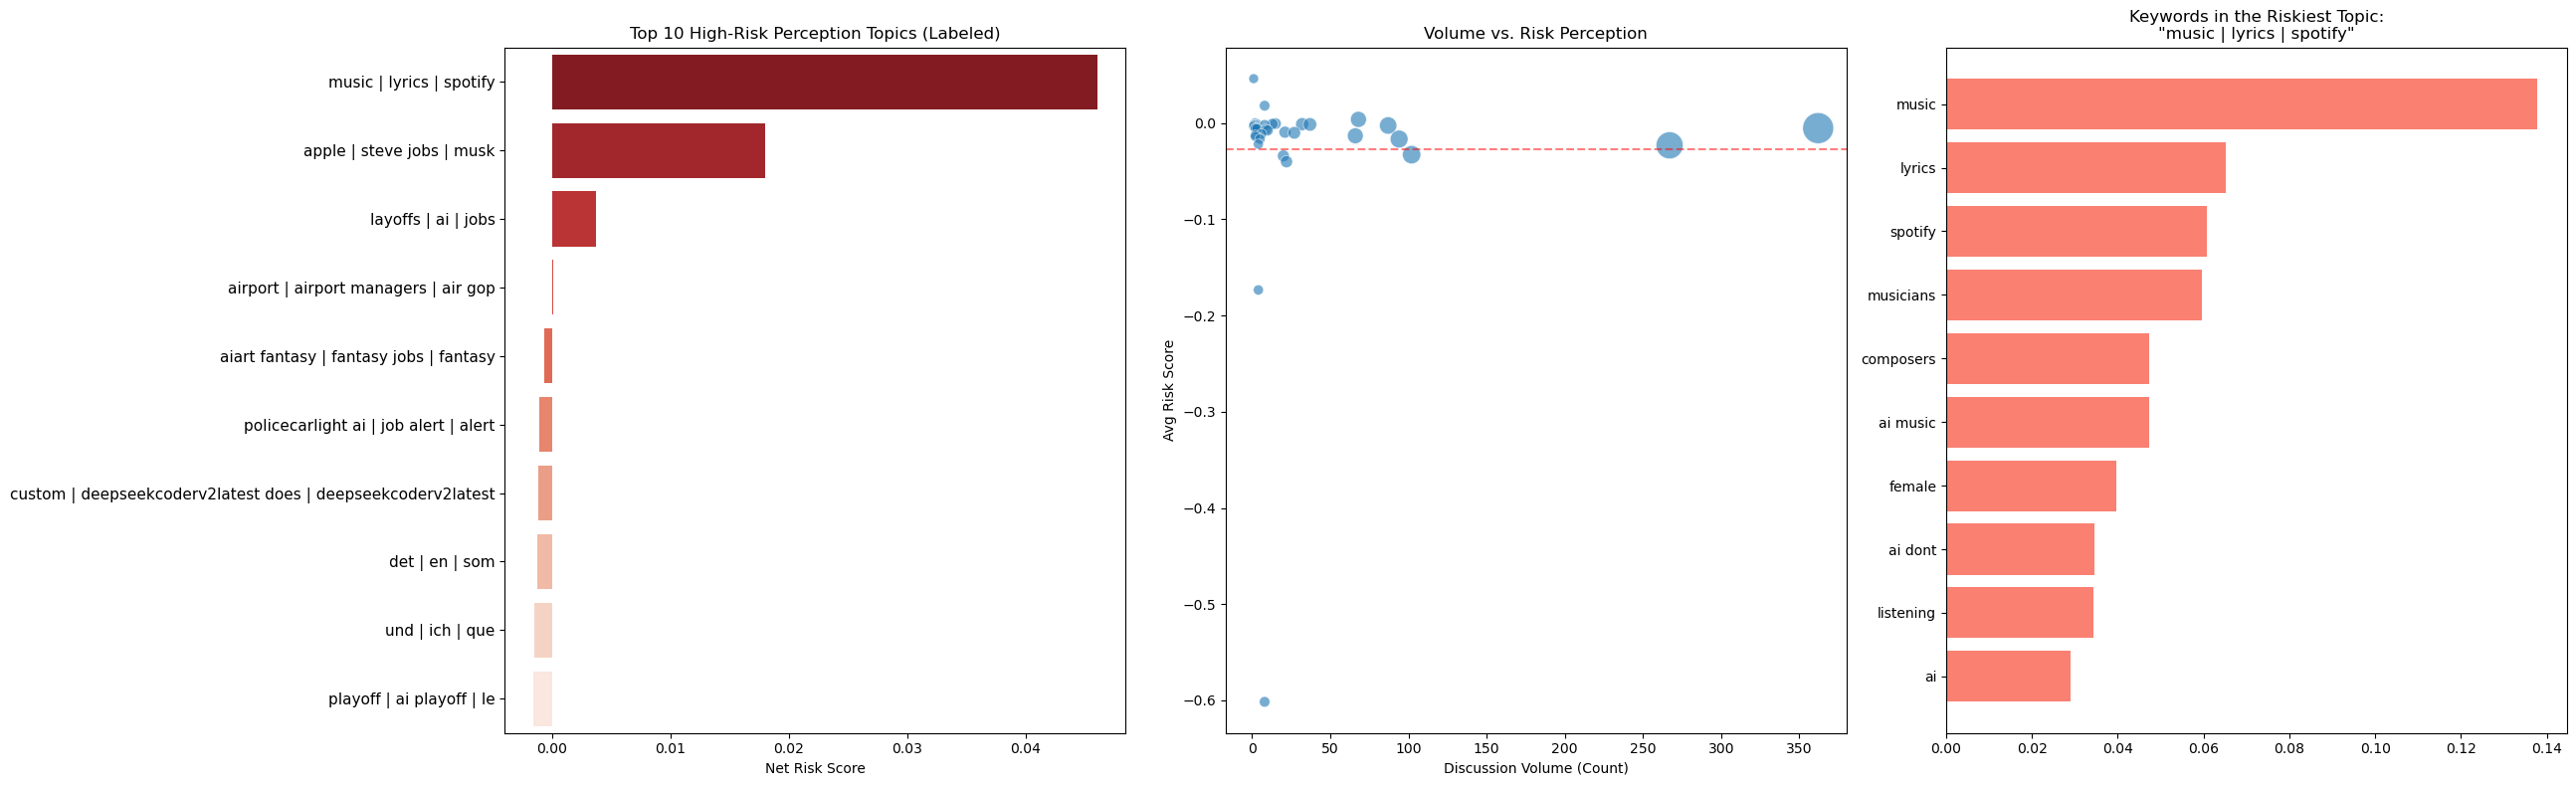

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# Step 2: Re-plot with Readable Labels
# ==========================================
fig, axes = plt.subplots(1, 3, figsize=(26, 8)) # Made it slightly wider for text

# --- Chart 1: The Risk Leaderboard (Labeled) ---
top_10_risky = topic_stats_clean.head(10)

sns.barplot(
    x=top_10_risky['Avg_Risk_Score'],
    # KEY CHANGE: Use the new readable label for Y-axis
    y=top_10_risky['Topic_Label'], 
    ax=axes[0],
    palette='Reds_r'
)
axes[0].set_title('Top 10 High-Risk Perception Topics (Labeled)')
axes[0].set_xlabel('Net Risk Score')
axes[0].tick_params(axis='y', labelsize=11) # Increase font size for readability
axes[0].set_ylabel('') # Remove redundant Y-axis label


# --- Chart 2: Volume vs. Risk (Same as before) ---
sns.scatterplot(
    data=topic_stats_clean, 
    x='Volume', 
    y='Avg_Risk_Score', 
    size='Volume', 
    sizes=(50, 500), 
    alpha=0.6, 
    ax=axes[1], 
    legend=False
)
axes[1].set_title('Volume vs. Risk Perception')
axes[1].set_xlabel('Discussion Volume (Count)')
axes[1].set_ylabel('Avg Risk Score')
# Add mean line
axes[1].axhline(y=topic_stats_clean['Avg_Risk_Score'].mean(), color='red', linestyle='--', alpha=0.5, label='Mean Risk')


# --- Chart 3: Keywords in the Riskiest Topic (Labeled) ---
if not topic_stats_clean.empty:
    # Get ID and Label of the #1 risky topic
    riskiest_topic_id = topic_stats_clean.index[0]
    riskiest_topic_label = topic_stats_clean.iloc[0]['Topic_Label']
    
    keywords = topic_model.get_topic(riskiest_topic_id) 
    if keywords:
        words = [k[0] for k in keywords[:10]]
        scores = [k[1] for k in keywords[:10]]
        axes[2].barh(words, scores, color='salmon')
        # KEY CHANGE: Add topic name to title
        axes[2].set_title(f'Keywords in the Riskiest Topic:\n"{riskiest_topic_label}"')
        axes[2].invert_yaxis()
    else:
        axes[2].text(0.5, 0.5, 'No keywords found', ha='center')

plt.tight_layout()

# Save with high DPI and white background
output_dir = "job_filtered_graphs"
os.makedirs(output_dir, exist_ok=True)
save_path = os.path.join(output_dir, "risk_perception_analysis_labeled.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
print(f"Plot saved as: {save_path}")  
plt.show()

   Topic  Count                                            Name  \
0     -1   4146                              -1_ai_job_jobs_llm   
1      0   2278                           0_ai_job_jobs_chatgpt   
2      1   1653                         1_chatgpt_job_write_use   
3      2    589            2_openai_platform_jobs platform_jobs   
4      3    588                             3_llm_job_llms_like   
5      4    533  4_loudspeaker_link_jobalert_jobalert jobsearch   
6      5    460                        5_layoffs_ai_jobs_amazon   
7      6    445   6_gemini_job_gemini hiring_loudspeaker gemini   
8      7    258                               7_und_ich_que_die   
9      8    177                        8_yc_engineer_hiring_llm   

                                      Representation  \
0  [ai, job, jobs, llm, openai, just, like, peopl...   
1  [ai, job, jobs, chatgpt, people, like, just, u...   
2  [chatgpt, job, write, use, using chatgpt, just...   
3  [openai, platform, jobs platform, j

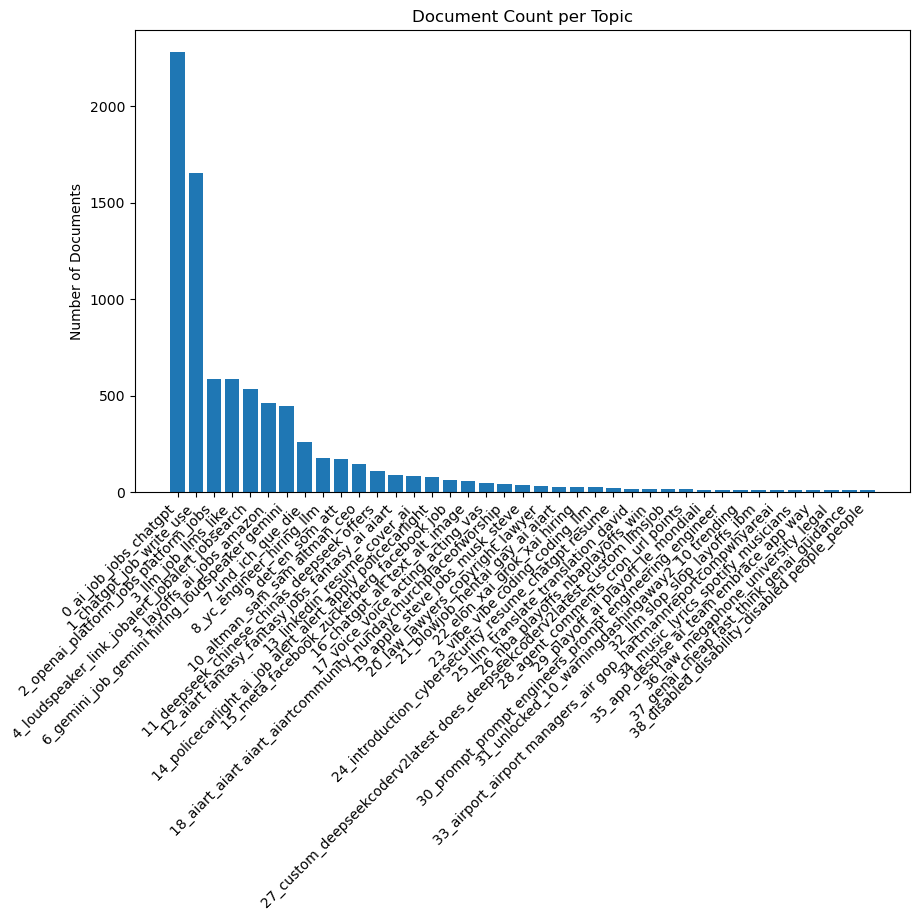

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic

# 1️⃣ Get topic overview
topic_info = topic_model.get_topic_info()
print(topic_info.head(10))  # Print top 10 topics

# 2️⃣ Plot topic counts (excluding noise topic -1)
plt.figure(figsize=(10,6))
topic_info_filtered = topic_info[topic_info['Topic'] != -1]  # Exclude noise
plt.bar(topic_info_filtered['Name'], topic_info_filtered['Count'])
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Documents')
plt.title('Document Count per Topic')
save_path = os.path.join(output_dir, 'topic_document_counts.png')
plt.savefig(save_path, bbox_inches='tight', dpi=300)
plt.show()


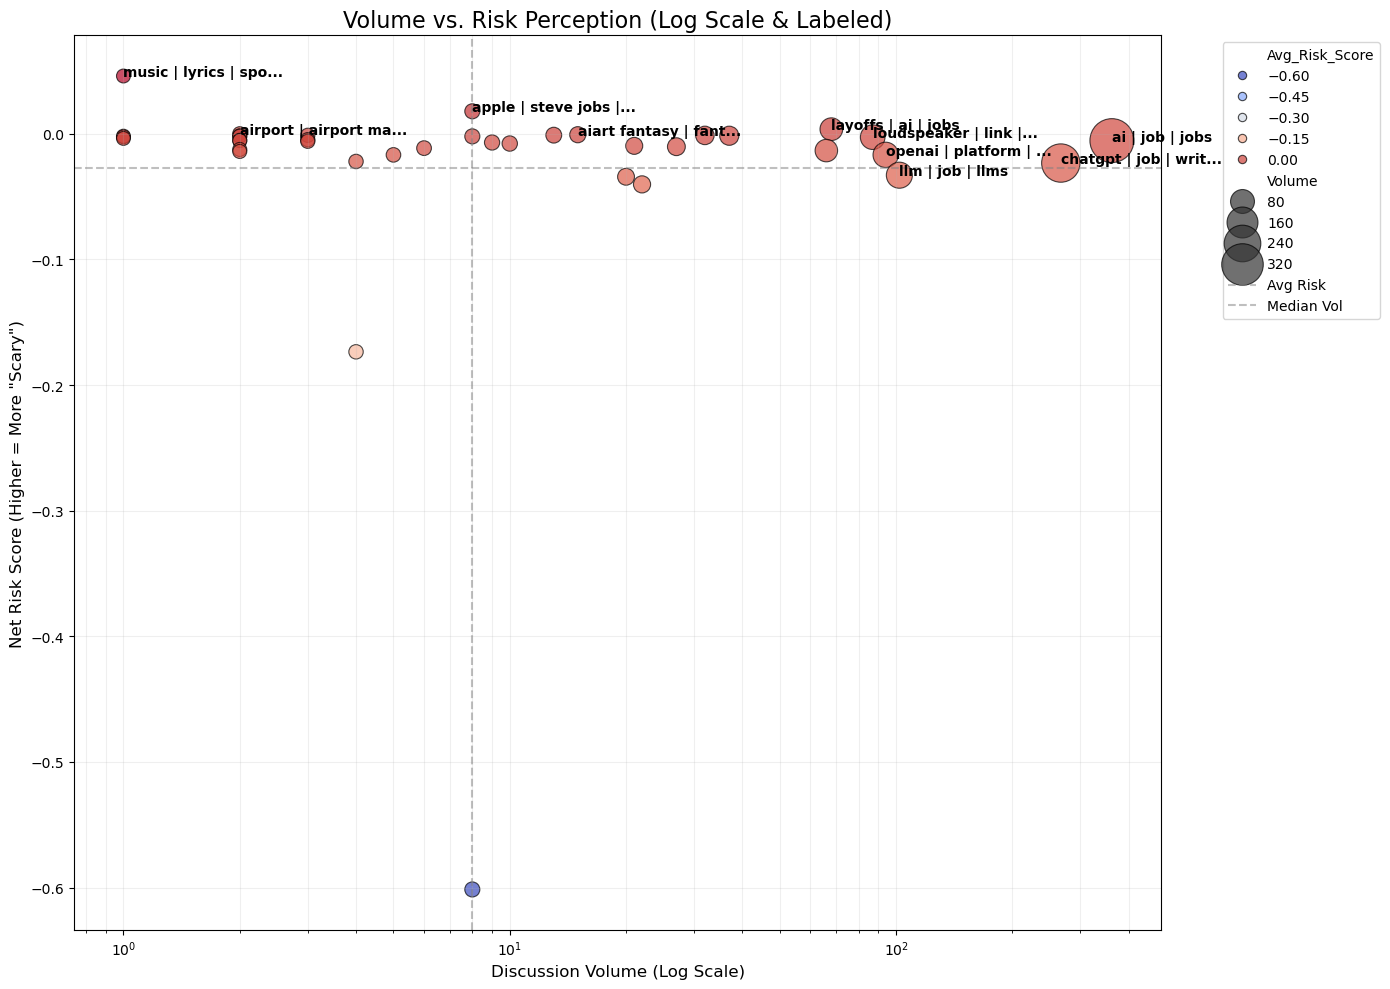

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# Improved Scatter Plot Visualization
# ==========================================

# Set up the figure size - make it large and clear
plt.figure(figsize=(14, 10))

# 1. Create the scatter plot with more visual dimensions
# Hue (Color): Based on Risk Score (Red=Scary, Blue=Calm)
# Size: Based on Volume (Bigger=More Talked About)
scatter = sns.scatterplot(
    data=topic_stats_clean, 
    x='Volume', 
    y='Avg_Risk_Score', 
    size='Volume', 
    hue='Avg_Risk_Score',      # Color by risk
    palette='coolwarm',        # Red-Blue diverging palette
    sizes=(100, 1000),         # Make bubbles bigger generally
    alpha=0.7,                 # Transparency
    edgecolor='black'          # Add border to bubbles
)

# 2. KEY FIX: Use Logarithmic Scale for X-axis
# This spreads out the "squashed" points on the left
plt.xscale('log')

# 3. Add Reference Lines (Quadrants)
# Mean Risk Line
plt.axhline(y=topic_stats_clean['Avg_Risk_Score'].mean(), color='grey', linestyle='--', alpha=0.5, label='Avg Risk')
# Median Volume Line
plt.axvline(x=topic_stats_clean['Volume'].median(), color='grey', linestyle='--', alpha=0.5, label='Median Vol')

# 4. Add Text Labels (Smart Annotation)
# We don't want to label everything (too messy). 
# Let's label: Top 5 Riskiest + Top 5 Highest Volume
texts = []

# Sort by Risk (High to Low) and take top 5
top_risky = topic_stats_clean.sort_values('Avg_Risk_Score', ascending=False).head(5)
# Sort by Volume (High to Low) and take top 5
top_vol = topic_stats_clean.sort_values('Volume', ascending=False).head(5)

# Combine them and remove duplicates
points_to_label = pd.concat([top_risky, top_vol]).drop_duplicates()

for idx, row in points_to_label.iterrows():
    # Get the label (Shorten it if it's too long)
    label_text = row['Topic_Label']
    if len(label_text) > 20:
        label_text = label_text[:20] + "..."
        
    plt.text(
        x=row['Volume'], 
        y=row['Avg_Risk_Score'], 
        s=label_text, 
        fontsize=10,
        weight='bold',
        color='black'
    )

# 5. Final Polish
plt.title('Volume vs. Risk Perception (Log Scale & Labeled)', fontsize=16)
plt.xlabel('Discussion Volume (Log Scale)', fontsize=12)
plt.ylabel('Net Risk Score (Higher = More "Scary")', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left') # Move legend outside
plt.grid(True, which="both", ls="-", alpha=0.2)

plt.tight_layout()
save_path = os.path.join(output_dir, 'improved_scatter_plot.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')
plt.show()

Fix complete! final_df now contains the 'Topic_Label' column.


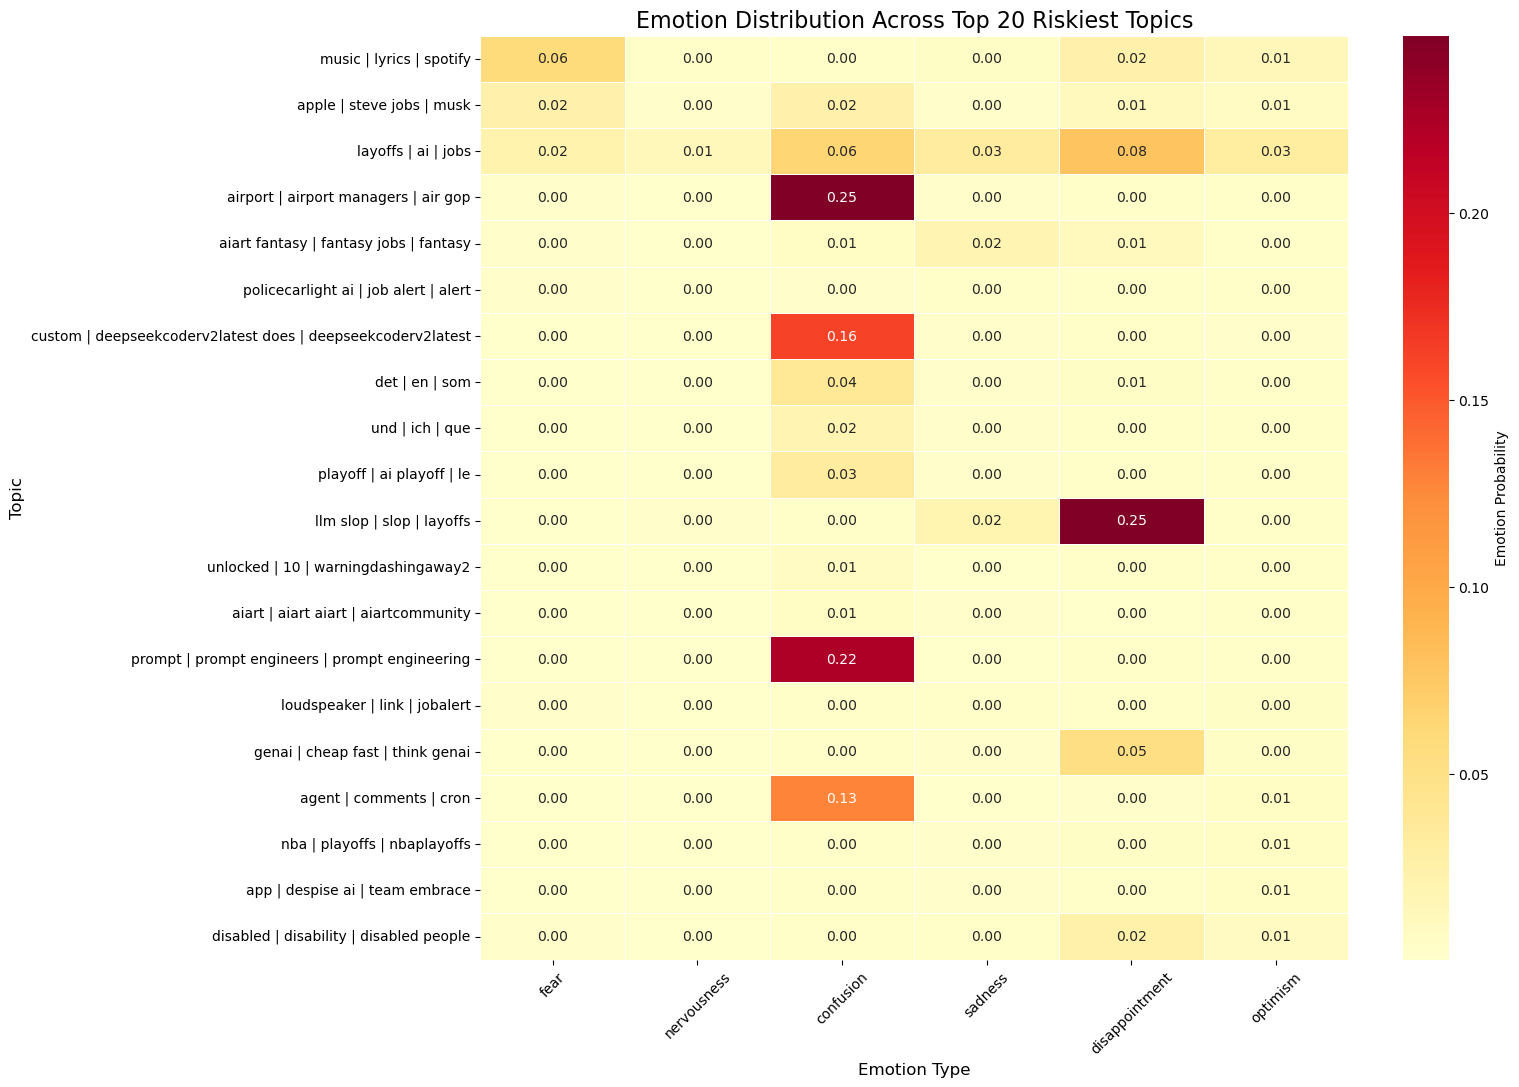

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ==========================================
# 1. Fix missing column
# ==========================================

#Topic ID -> Topic Label
topic_id_to_label = {}

for topic_id in set(final_df['topic']):
    keywords_list = topic_model.get_topic(topic_id)
    
    if keywords_list:
        top_3_words = [k[0] for k in keywords_list[:3]]
        label = " | ".join(top_3_words)
    else:
        label = f"Topic {topic_id}"
        
    topic_id_to_label[topic_id] = label

final_df['Topic_Label'] = final_df['topic'].map(topic_id_to_label)
print("Fix complete! final_df now contains the 'Topic_Label' column.")


# ==========================================
# 2. Prepare Data
# ==========================================

heatmap_emotions = ['fear', 'nervousness', 'confusion', 'sadness', 'disappointment', 'optimism']


topic_emotion_stats = final_df.groupby('Topic_Label')[heatmap_emotions + ['net_risk_score']].mean()

topic_emotion_stats = topic_emotion_stats.sort_values('net_risk_score', ascending=False).head(20)

plot_data = topic_emotion_stats.drop(columns=['net_risk_score'])


# ==========================================
# 3. Draw Heatmap
# ==========================================

plt.figure(figsize=(14, 12))

sns.heatmap(
    plot_data, 
    annot=True,       
    fmt=".2f",        
    cmap='YlOrRd',   
    linewidths=.5,
    cbar_kws={'label': 'Emotion Probability'} 
)

plt.title('Emotion Distribution Across Top 20 Riskiest Topics', fontsize=16)
plt.xlabel('Emotion Type', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.xticks(rotation=45)

save_path = os.path.join(output_dir, 'emotion_distribution_heatmap.png') 
plt.savefig(save_path, dpi=300, bbox_inches='tight', facecolor='white')

plt.show()

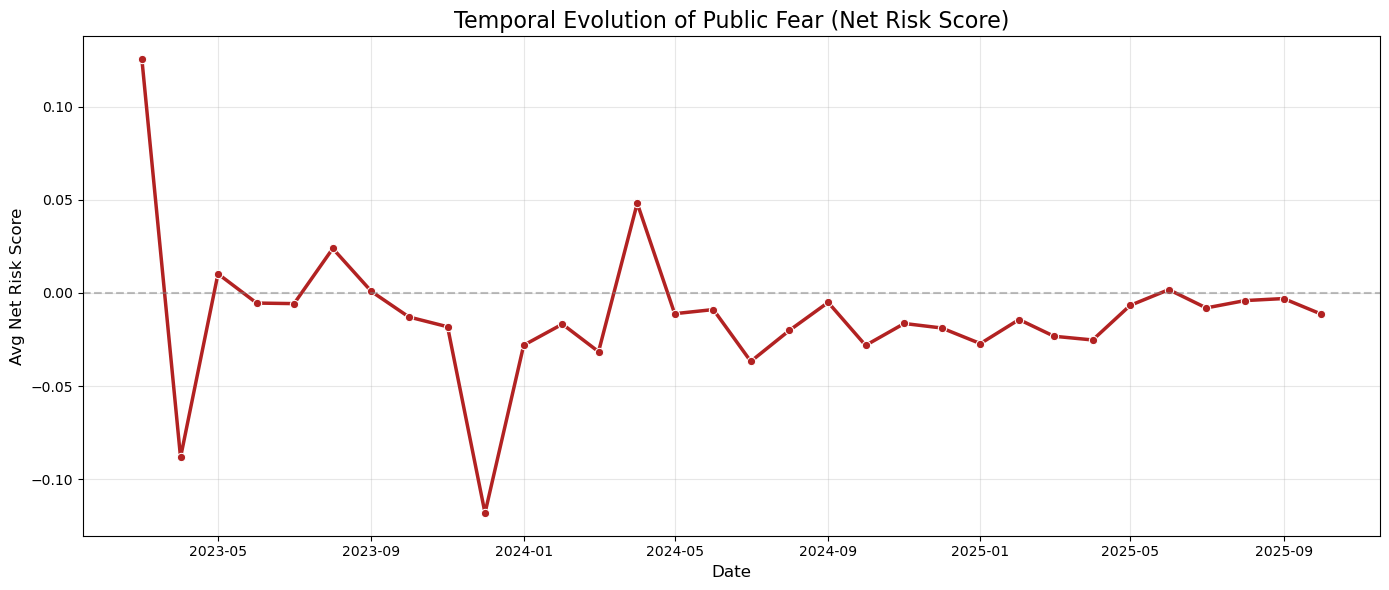

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ==========================================
# 1. Preprocessing Time Data
# ==========================================
# Convert 'created_at' to datetime objects
# errors='coerce' will turn unparseable dates into NaT (Not a Time) so it doesn't crash
final_df['created_at'] = pd.to_datetime(final_df['created_at'], errors='coerce')

# Remove rows with invalid dates
time_df = final_df.dropna(subset=['created_at']).copy()

# Extract Year-Month for grouping (e.g., "2023-01")
time_df['year_month'] = time_df['created_at'].dt.to_period('M')

# ==========================================
# 2. Calculate Monthly Trends
# ==========================================
# Calculate average risk score per month
monthly_risk = time_df.groupby('year_month')['net_risk_score'].mean().reset_index()
# Convert back to timestamp for plotting
monthly_risk['timestamp'] = monthly_risk['year_month'].dt.to_timestamp()

# ==========================================
# 3. Plotting: General Fear Trend
# ==========================================
plt.figure(figsize=(14, 6))

sns.lineplot(data=monthly_risk, x='timestamp', y='net_risk_score', marker='o', linewidth=2.5, color='firebrick')

plt.title('Temporal Evolution of Public Fear (Net Risk Score)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Avg Net Risk Score', fontsize=12)
plt.grid(True, alpha=0.3)

# Add a reference line for neutral risk
plt.axhline(0, color='grey', linestyle='--', alpha=0.5)

plt.tight_layout()
save_path = os.path.join(output_dir, 'temporal_fear_trend.png')
plt.savefig(save_path, dpi=300)
plt.show()

Spearman Correlation Matrix:
                net_risk_score  like_count  repost_count
net_risk_score        1.000000   -0.045223     -0.001097
like_count           -0.045223    1.000000      0.473607
repost_count         -0.001097    0.473607      1.000000


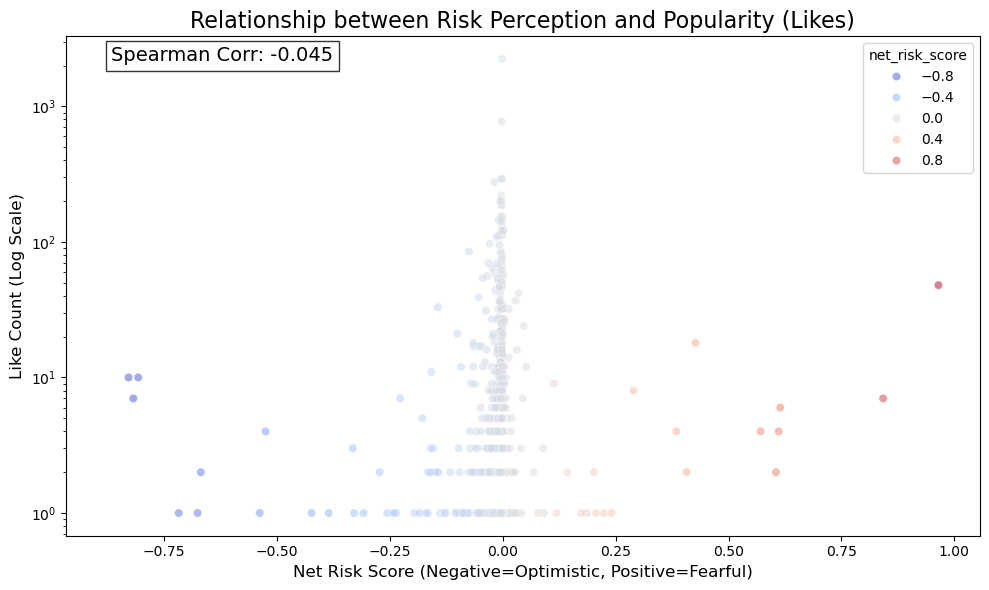

In [54]:
# ==========================================
# Engagement Analysis: Does Fear go Viral?
# ==========================================
import numpy as np

# 1. Correlation Calculation
# We use Spearman correlation because like counts are usually not normally distributed (power law)
correlation = final_df[['net_risk_score', 'like_count', 'repost_count']].corr(method='spearman')

print("Spearman Correlation Matrix:")
print(correlation)

# 2. Visualization
plt.figure(figsize=(10, 6))

# We use log scale for likes because usually a few posts have huge likes
sns.scatterplot(
    data=final_df, 
    x='net_risk_score', 
    y='like_count', 
    alpha=0.5, 
    hue='net_risk_score', 
    palette='coolwarm'
)

plt.yscale('log') # Log scale for Y-axis (Likes)
plt.title('Relationship between Risk Perception and Popularity (Likes)', fontsize=16)
plt.xlabel('Net Risk Score (Negative=Optimistic, Positive=Fearful)', fontsize=12)
plt.ylabel('Like Count (Log Scale)', fontsize=12)

# Add text annotation for the result
corr_value = correlation.loc['net_risk_score', 'like_count']
plt.text(0.05, 0.95, f'Spearman Corr: {corr_value:.3f}', transform=plt.gca().transAxes, fontsize=14, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
save_path = os.path.join(output_dir, 'fear_engagement_correlation.png')
plt.savefig(save_path, dpi=300)
plt.show()

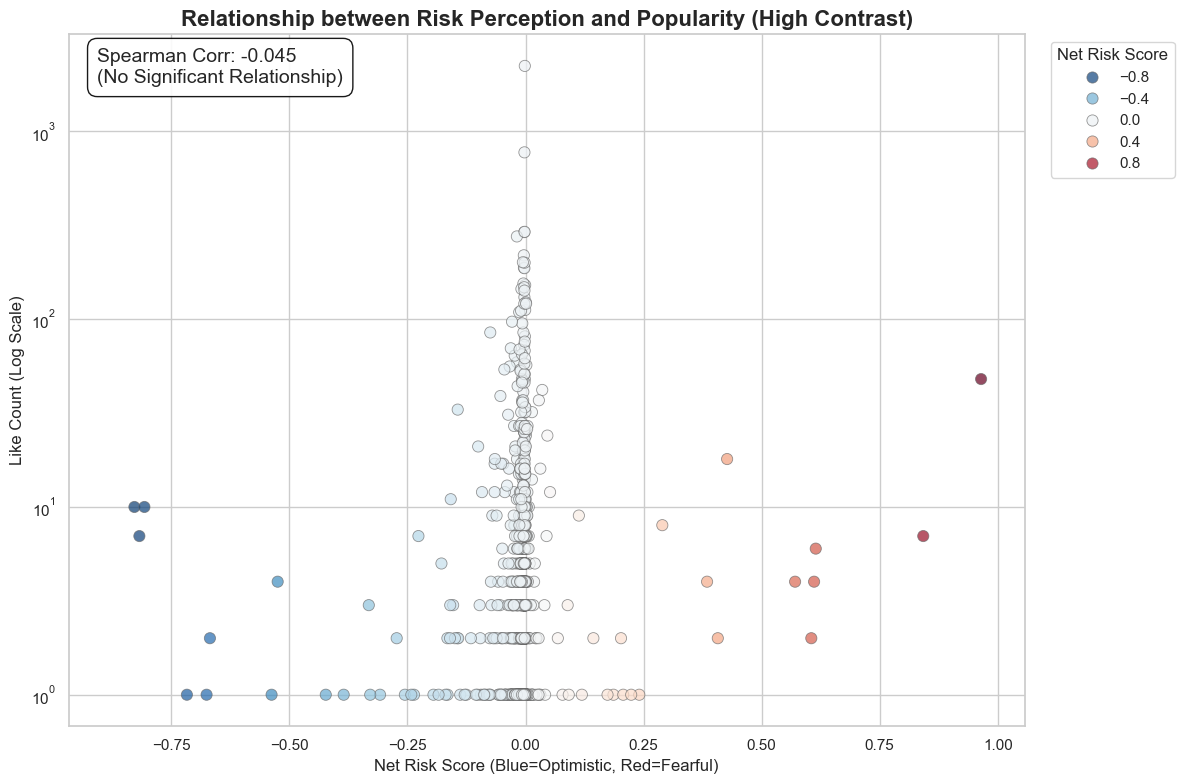

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_theme(style="whitegrid")

plt.figure(figsize=(12, 8))

correlation = final_df[['net_risk_score', 'like_count']].corr(method='spearman')
corr_value = correlation.loc['net_risk_score', 'like_count']


scatter = sns.scatterplot(
    data=final_df, 
    x='net_risk_score', 
    y='like_count', 
    hue='net_risk_score', 
    palette='RdBu_r',      
    alpha=0.7,             
    edgecolor='dimgrey',   
    linewidth=0.6,         
    s=65                   
)


plt.yscale('log')


plt.title('Relationship between Risk Perception and Popularity (High Contrast)', fontsize=16, fontweight='bold')
plt.xlabel('Net Risk Score (Blue=Optimistic, Red=Fearful)', fontsize=12)
plt.ylabel('Like Count (Log Scale)', fontsize=12)


plt.text(0.03, 0.93, f'Spearman Corr: {corr_value:.3f}\n(No Significant Relationship)', 
         transform=plt.gca().transAxes, fontsize=14, 
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5', alpha=0.9))


plt.legend(title='Net Risk Score', bbox_to_anchor=(1.02, 1), loc='upper left')

plt.tight_layout()
save_path = os.path.join(output_dir, 'fear_engagement_high_contrast.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
# 3️⃣ Visualize topic similarity map
topic_model.visualize_topics()

# 4️⃣ Plot top keywords for each topic
for topic_num in topic_info_filtered['Topic'].tolist():
    words = topic_model.get_topic(topic_num)
    if words:
        word_labels, word_scores = zip(*words)
        plt.figure(figsize=(8,4))
        plt.barh(word_labels, word_scores)
        plt.title(f"Topic {topic_num} Keywords")
        plt.gca().invert_yaxis()
        plt.xlabel('Weight')
        plt.show()


In [ ]:
# 5️⃣ Assign topics back to original dataframe
job_filtered_df['topic'] = topics
job_filtered_df['topic_probability'] = [prob.max() for prob in probabilities]

# 6️⃣ Plot document count per topic
topic_counts = job_filtered_df['topic'].value_counts().sort_index()
plt.figure(figsize=(10,6))
topic_counts.plot(kind='bar')
plt.xlabel('Topic Number')
plt.ylabel('Number of Documents')
plt.title('Number of Documents per Topic')
plt.show()

# 7️⃣ Get detailed document-topic info (optional)
doc_info = topic_model.get_document_info(job_filtered_df['cleaned_text'].tolist())
display(doc_info.head())


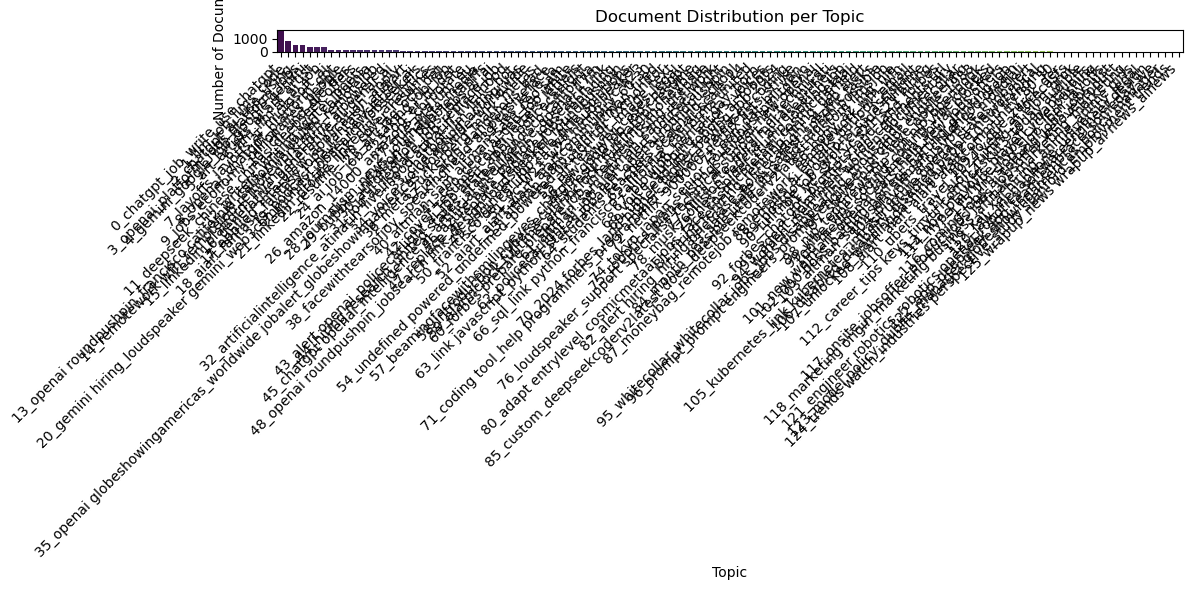

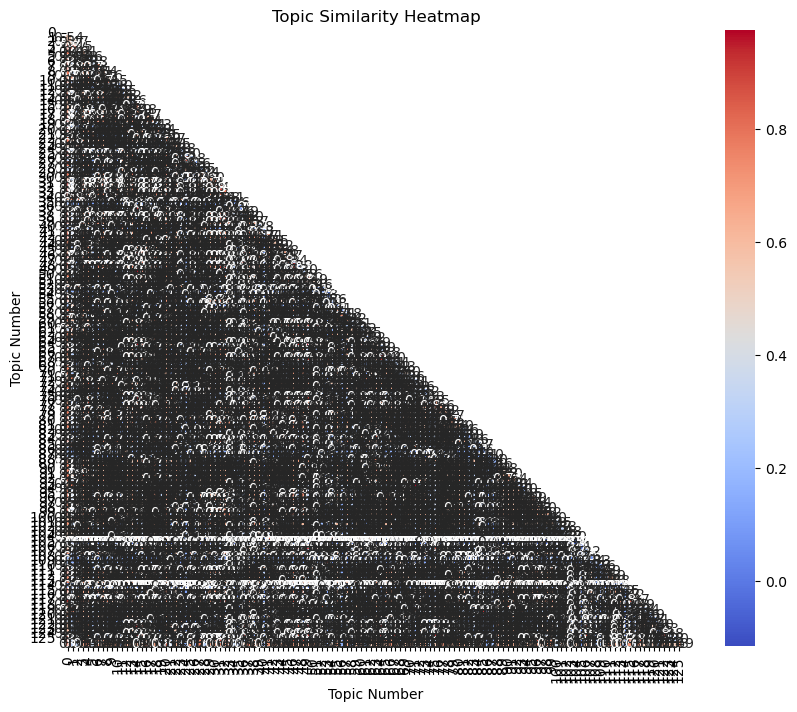

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from bertopic import BERTopic

# 1️⃣ Get topic info
topic_info = topic_model.get_topic_info()
topic_info_filtered = topic_info[topic_info['Topic'] != -1]  # Exclude noise

# 2️⃣ Beautiful topic distribution plot
plt.figure(figsize=(12,6))
sns.barplot(x='Name', y='Count', data=topic_info_filtered.sort_values('Count', ascending=False), palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Documents')
plt.xlabel('Topic')
plt.title('Document Distribution per Topic')
plt.tight_layout()
plt.show()

# 3️⃣ Topic similarity heatmap
# Get topic embeddings
topic_embeddings = topic_model.topic_embeddings_
if topic_embeddings is not None:
    # Compute cosine similarity between topics
    from sklearn.metrics.pairwise import cosine_similarity
    import numpy as np
    
    similarity_matrix = cosine_similarity(topic_embeddings)
    
    # Mask upper triangle to avoid repetition
    mask = np.triu(np.ones_like(similarity_matrix, dtype=bool))
    
    plt.figure(figsize=(10,8))
    sns.heatmap(similarity_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask=mask,
                xticklabels=topic_info_filtered['Topic'], yticklabels=topic_info_filtered['Topic'])
    plt.title('Topic Similarity Heatmap')
    plt.xlabel('Topic Number')
    plt.ylabel('Topic Number')
    plt.show()
else:
    print("No topic embeddings available for heatmap.")
